# 数据预处理

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import os
def gyroscope_anxiety():
    """
    对于箱型图的离群点可以通过设置异常值进行删除
    """
    l=os.listdir("C:/Users/hw1102/Desktop/data/gyroscope/anxiety")
    """
    首先对gyroscope/anxiety文件进行预处理，通过数据探索绘制条形图发现，存在4个空值，1个异常值，通过箱型图发现1个离群点
    >>> 删除含有空值的记录，并对第一项的离群点用平均值进行修正
    """
    df=[]   #df为存储每个json文件进行测试的总时间数
    every_plt=[]   #every_plt为dataframe类型的数据的数据，主要用于绘制子图以及相关describe()方法数据的分析
    for file in l:
        indexs = pd.read_json("C:/Users/hw1102/Desktop/data/gyroscope/anxiety/"+file)
        every_plt.append(indexs)
        df.append(len(indexs)/300)   #数据采集频率为5hz，再除以60,单位变为min
    del df[12:14]       #对于空值，我们选择删除含有这个异常值（空值）的记录
    del df[20:22]       #本来我们应该del df[22:24]，因为执行过一次删除操作改变了索引所以应该del df[20:22]
    df[0]=sum(df[1:])/len(df[1:])     #对于第一项的离群点，我们使用平均值来进行修正，并不影响时间特征对测试结果的影响
    ax1=plt.subplot(1,2,1)
    plt.bar(range(len(df)),df)
    ax2=plt.subplot(1,2,2)   #绘制箱型图，便于观察离群点
    plt.boxplot(df)
    plt.show()
    """
    相应的对Dataframe类型的数组every_plt也进行相应的删除，得出每个子图的折线图，对其进行观察分析
    >>> 对每个子图的分析发现除第一个记录的答题时间过长，其他记录均无异常
    """
    del every_plt[12:14]
    del every_plt[20:22]   #保持数据的一致性，在上述分析中对空值进行删除，因此绘制子图时该记录已被删除
    for index,every in enumerate(every_plt):
        every.plot()
        plt.title(index)   #绘制每一个子图，通过观察查看数据有无异常
    plt.show()
    """
    对预处理的结果进行保存，写入另外的文件中
    """
    for index,every in enumerate(every_plt):
        every.to_json("C:/Users/hw1102/Desktop/data/gyroscope/preprocessed_anxiety/data"+str(index), orient='records') 
def gyroscope_health():
    l=os.listdir("C:/Users/hw1102/Desktop/data/gyroscope/health")
    """
    首先对gyroscope/health文件进行预处理，通过数据探索绘制条形图发现，存在1个空值，5个异常值，通过盒图发现6个离群点
    >>> 删除含有空值的记录
    """
    df=[]
    every_plt=[]
    for file in l:
        indexs = pd.read_json("C:/Users/hw1102/Desktop/data/gyroscope/health/"+file)
        every_plt.append(indexs)
        df.append(len(indexs)/300)
    del df[17]
    del df[27]
    del df[21]
    del df[15]   #删除异常值，也可以通过设置异常值利用列表推导式进行删除，例如 df = [i for i in df if df<=异常值]
    del df[4] 
    del df[13]
    del df[11]
    del df[7] #下图对子图的观察发现every_plt[7]属于异常值进行删除，同时对时间数据进行更改，保持数据一致性
    ax1=plt.subplot(1,2,1)
    plt.bar(range(len(df)),df)
    ax2=plt.subplot(1,2,2)   
    plt.boxplot(df)
    plt.show()
    """通过对every_plt每个dataframe元素的绘制可以观察到，every_plt[7]的图在前三分钟陀螺仪数据正常，但是后期基本无变化
    >>> 可能原因是将手机放置在座子上，对我们的数据分析而言属于异常值，进行删除
    """
    del every_plt[17]
    del every_plt[27]
    del every_plt[21]
    del every_plt[15]   #随着df相应的进行删除
    del every_plt[4] 
    del every_plt[13]
    del every_plt[11]
    del every_plt[6]   #该数据后期可能是手机置于座子上所测，无意义进行删除
    for index,every in enumerate(every_plt):
        every.plot()
        plt.title(index)
    plt.show()
    """
    对预处理的结果进行保存，写入另外的文件中
    """
    for index,every in enumerate(every_plt):
        every.to_json("C:/Users/hw1102/Desktop/data/gyroscope/preprocessed_health/data"+str(index), orient='records') 
def accelerometer_anxiety():
    l=os.listdir("C:/Users/hw1102/Desktop/data/accelerometer/anxiety")
    """
    首先对accelerometer/anxiety文件进行预处理，通过数据探索绘制条形图发现，存在6个异常值，通过盒图发现6个离群点
    """
    df=[]
    every_plt=[]
    for file in l:
        indexs = pd.read_json("C:/Users/hw1102/Desktop/data/accelerometer/anxiety/"+file)
        every_plt.append(indexs)
        df.append(len(indexs)/300)
    del df[35]
    del df[24]
    del df[14]
    del df[11]
    del df[6]
    del df[0]
    del df[19]
    del df[8]
    ax1=plt.subplot(1,2,1)
    plt.bar(range(len(df)),df)
    ax2=plt.subplot(1,2,2)   
    plt.boxplot(df)
    plt.show()
    """
    对每个子图进行观察分析处理
    """
    del every_plt[35]
    del every_plt[24]
    del every_plt[14]
    del every_plt[11]
    del every_plt[6]
    del every_plt[0]
    del every_plt[19]
    del every_plt[8]
    for index,every in enumerate(every_plt):
        every.plot()
        plt.title(index)   #绘制每一个子图，通过观察查看数据有无异常
    plt.show()
    #将删除空记录以及去除异常记录后的文件进行保存
    for index,every in enumerate(every_plt):
        every.to_json("C:/Users/hw1102/Desktop/data/accelerometer/preprocessed_anxiety/data"+str(index), orient='records') 
def accelerometer_health():
    l=os.listdir("C:/Users/hw1102/Desktop/data/accelerometer/health")
    """
    首先对accelerometer/health文件进行预处理，通过数据探索绘制条形图发现，存在6个异常值，通过盒图发现6个离群点
    """
    df=[]
    every_plt=[]
    for file in l:
        indexs = pd.read_json("C:/Users/hw1102/Desktop/data/accelerometer/health/"+file)
        every_plt.append(indexs)
        df.append(len(indexs)/300)
    del df[35]
    del df[32]
    del df[26:29]
    del df[17:19]
    del df[8]
    del df[5]
    ax1=plt.subplot(1,2,1)
    plt.bar(range(len(df)),df)
    ax2=plt.subplot(1,2,2)   
    plt.boxplot(df)
    plt.show()
    """
    对每个子图进行观察分析处理
    """
    del every_plt[35]
    del every_plt[32]
    del every_plt[26:29]
    del every_plt[17:19]
    del every_plt[8]
    del every_plt[5]
    for index,every in enumerate(every_plt):
        every.plot()
        plt.title(index)   #绘制每一个子图，通过观察查看数据有无异常
    plt.show()
    #将删除空记录以及去除异常记录后的文件进行保存
    for index,every in enumerate(every_plt):
        every.to_json("C:/Users/hw1102/Desktop/data/accelerometer/preprocessed_health/data"+str(index), orient='records') 
def device_motion_anxiety():
    l=os.listdir("C:/Users/hw1102/Desktop/data/device_motion/anxiety")
    """
    首先对device_motion/anxiety文件进行预处理，通过数据探索绘制条形图发现，数据方差较大，但是无离群点
    """
    df=[]
    every_plt=[]
    for file in l:
        indexs = pd.read_json("C:/Users/hw1102/Desktop/data/device_motion/anxiety/"+file)
        every_plt.append(indexs)
        df.append(len(indexs)/300)
    del df[23]
    del df[10]
    ax1=plt.subplot(1,2,1)
    plt.bar(range(len(df)),df)
    ax2=plt.subplot(1,2,2)   
    plt.boxplot(df)
    plt.show()
    """
    对每个子图进行观察分析处理
    """
    del every_plt[23]
    del every_plt[10]
    for index,every in enumerate(every_plt):
        every.plot()
        plt.title(index)
    plt.show()
     #将删除空记录以及去除异常记录后的文件进行保存
    for index,every in enumerate(every_plt):
        every.to_json("C:/Users/hw1102/Desktop/data/device_motion/preprocessed_anxiety/data"+str(index), orient='records') 
def device_motion_health():
    l=os.listdir("C:/Users/hw1102/Desktop/data/device_motion/health")
    """
    首先对device_motion/health文件进行预处理，通过数据探索绘制条形图发现，数据方差较大，盒图无离群点
    """
    df=[]
    every_plt=[]
    for file in l:
        indexs = pd.read_json("C:/Users/hw1102/Desktop/data/device_motion/health/"+file)
        every_plt.append(indexs)
        df.append(len(indexs)/300)
    del df[23]
    del df[19]
    del df[17]
    del df[15]
    del df[12]
    ax1=plt.subplot(1,2,1)
    plt.bar(range(len(df)),df)
    ax2=plt.subplot(1,2,2)   
    plt.boxplot(df)
    plt.show()
    """
    对每个子图进行观察分析处理
    """
    del every_plt[23]
    del every_plt[19]
    del every_plt[17]
    del every_plt[15]
    del every_plt[12]
    for index,every in enumerate(every_plt):
        every.plot()
        plt.title(index)
    plt.show()
    #将删除空记录以及去除异常记录后的文件进行保存
    for index,every in enumerate(every_plt):
        every.to_json("C:/Users/hw1102/Desktop/data/device_motion/preprocessed_anxiety/data"+str(index), orient='records') 
def main():
    if name=="__main__":
        gyroscope_anxiety()
        gyroscope_health()
        device_motion_health()
        device_motion_anxiety()
        accelerometer_health()
        accelerometer_anxiety()

# gyroscope/anxiety 预处理

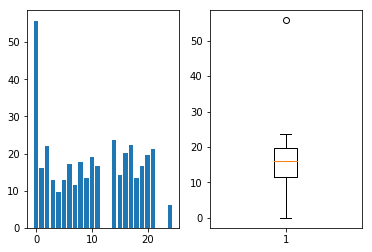

In [3]:
    import pandas as pd
    import matplotlib.pyplot as plt
    import os
    l=os.listdir("C:/Users/hw1102/Desktop/data/gyroscope/anxiety")
    """
    首先对gyroscope/anxiety文件进行预处理，通过数据探索绘制条形图发现，存在4个空值，1个异常值，通过箱型图发现1个离群点
    >>> 删除含有空值的记录，并对第一项的离群点用平均值进行修正
    """
    df=[]  #df为存储每个json文件进行测试的总时间数
    every_plt=[]   #every_plt为dataframe类型的数据的数据，主要用于绘制子图以及相关describe()方法数据的分析
    for file in l:
        indexs = pd.read_json("C:/Users/hw1102/Desktop/data/gyroscope/anxiety/"+file)
        every_plt.append(indexs)
        df.append(len(indexs)/300)   #数据采集频率为5hz，再除以60,单位变为min
    ax1=plt.subplot(1,2,1)
    plt.bar(range(len(df)),df)
    ax2=plt.subplot(1,2,2)   #绘制箱型图，便于观察离群点
    plt.boxplot(df)
    plt.show()

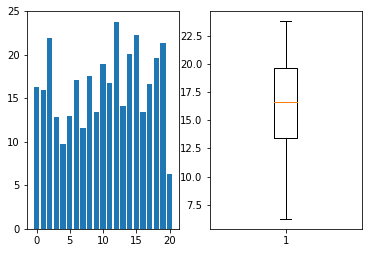

In [4]:
    del df[12:14]       #对于空值，我们选择删除含有这个异常值（空值）的记录
    del df[20:22]       #本来我们应该del df[22:24]，因为执行过一次删除操作改变了索引所以应该del df[20:22]
    df[0]=sum(df[1:])/len(df[1:])     #对于第一项的离群点，我们使用平均值来进行修正，并不影响时间特征对测试结果的影响
    ax1=plt.subplot(1,2,1)
    plt.bar(range(len(df)),df)
    ax2=plt.subplot(1,2,2)   
    plt.boxplot(df)
    plt.show()

In [7]:
    del every_plt[12:14]
    del every_plt[20:22]   #保持数据的一致性，在上述分析中对空值进行删除，因此绘制子图时该记录已被删除
    for index,every in enumerate(every_plt):
        every.plot()
        plt.title(index)   #绘制每一个子图，通过观察查看数据有无异常（因为提交的原因，每个子图可能无法在github中显示出来）
    plt.show()    

In [110]:
    #将删除空记录以及去除异常记录后的文件进行保存
    for index,every in enumerate(every_plt):
        every.to_json("C:/Users/hw1102/Desktop/data/gyroscope/preprocessed_anxiety/data"+str(index), orient='records') 

#  gyroscope/health 数据预处理

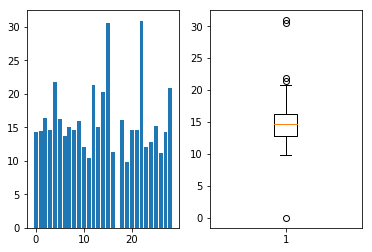

In [127]:
    l=os.listdir("C:/Users/hw1102/Desktop/data/gyroscope/health")
    """
    首先对gyroscope/health文件进行预处理，通过数据探索绘制条形图发现，存在1个空值，5个异常值，通过盒图发现5个离群点
    >>> 删除含有空值的记录
    """
    df=[]
    every_plt=[]
    for file in l:
        indexs = pd.read_json("C:/Users/hw1102/Desktop/data/gyroscope/health/"+file)
        every_plt.append(indexs)
        df.append(len(indexs)/300)
    ax1=plt.subplot(1,2,1)
    plt.bar(range(len(df)),df)
    ax2=plt.subplot(1,2,2)   
    plt.boxplot(df)
    plt.show()

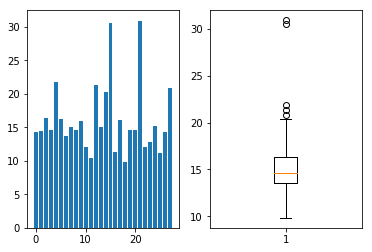

In [128]:
    del df[17] #删除空值
    ax1=plt.subplot(1,2,1)
    plt.bar(range(len(df)),df)
    ax2=plt.subplot(1,2,2)   
    plt.boxplot(df)
    plt.show()

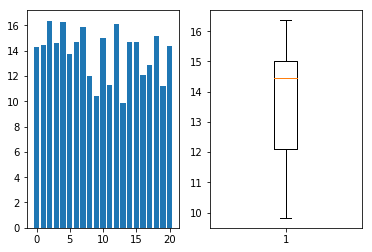

In [129]:
    del df[27]
    del df[21]
    del df[15]   #删除异常值
    del df[4] 
    del df[13]
    del df[11]
    del df[6]
    ax1=plt.subplot(1,2,1)
    plt.bar(range(len(df)),df)
    ax2=plt.subplot(1,2,2)   
    plt.boxplot(df)
    plt.show()

In [130]:
    del every_plt[17]
    del every_plt[27]
    del every_plt[21]
    del every_plt[15]   #随着df相应的进行删除
    del every_plt[4] 
    del every_plt[13]
    del every_plt[11]

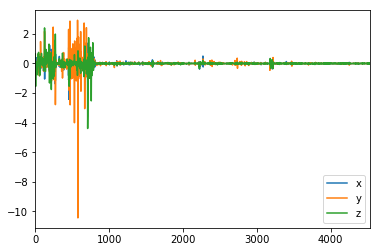

In [132]:
every_plt[6].plot()
plt.show()   #该数据后期几乎没有波动，可以推测可能是后面将手机置于桌子上，该数据没有意义，进行删除

In [6]:
    del every_plt[6]   #该数据后期可能是手机置于座子上所测，无意义进行删除
    for index,every in enumerate(every_plt):
        every.plot()
        plt.title(index)
    plt.show()

In [134]:
    for index,every in enumerate(every_plt):
        every.to_json("C:/Users/hw1102/Desktop/data/gyroscope/preprocessed_health/data"+str(index), orient='records') 

#  accelerometer_anxiety数据预处理

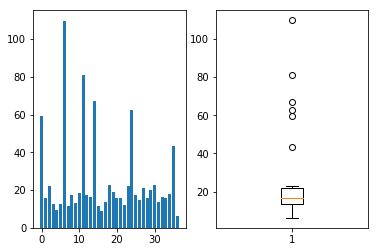

In [162]:
    l=os.listdir("C:/Users/hw1102/Desktop/data/accelerometer/anxiety")
    """
    首先对accelerometer/anxiety文件进行预处理，通过数据探索绘制条形图发现，存在6个异常值，通过盒图发现6个离群点
    """
    df=[]
    every_plt=[]
    for file in l:
        indexs = pd.read_json("C:/Users/hw1102/Desktop/data/accelerometer/anxiety/"+file)
        every_plt.append(indexs)
        df.append(len(indexs)/300)
    ax1=plt.subplot(1,2,1)
    plt.bar(range(len(df)),df)
    ax2=plt.subplot(1,2,2)   
    plt.boxplot(df)
    plt.show()

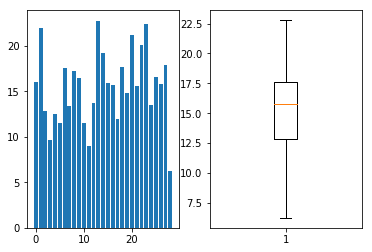

In [163]:
    del df[35]
    del df[24]
    del df[14]
    del df[11]
    del df[6]
    del df[0]
    del df[19]
    del df[8]
    ax1=plt.subplot(1,2,1)
    plt.bar(range(len(df)),df)
    ax2=plt.subplot(1,2,2)   
    plt.boxplot(df)
    plt.show()

In [8]:
    del every_plt[35]
    del every_plt[24]
    del every_plt[14]
    del every_plt[11]
    del every_plt[6]
    del every_plt[0]
    for index,every in enumerate(every_plt):
        every.plot()
        plt.title(index)   #绘制每一个子图，通过观察查看数据有无异常
    plt.show()    

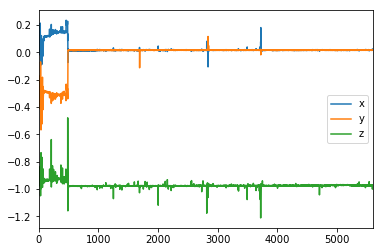

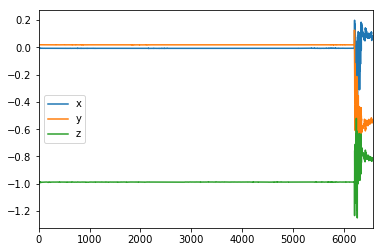

In [165]:
every_plt[8].plot()
every_plt[19].plot()
plt.show()    #这两个数据均为异常，予以删除
del every_plt[19]
del every_plt[8]

In [171]:
    #将删除空记录以及去除异常记录后的文件进行保存
    for index,every in enumerate(every_plt):
        every.to_json("C:/Users/hw1102/Desktop/data/accelerometer/preprocessed_anxiety/data"+str(index), orient='records') 

# accelerometer/health数据预处理

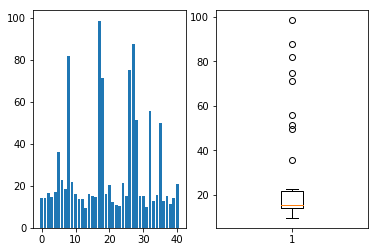

In [203]:
    l=os.listdir("C:/Users/hw1102/Desktop/data/accelerometer/health")
    """
    首先对accelerometer/health文件进行预处理，通过数据探索绘制条形图发现，存在6个异常值，通过盒图发现6个离群点
    """
    df=[]
    every_plt=[]
    for file in l:
        indexs = pd.read_json("C:/Users/hw1102/Desktop/data/accelerometer/health/"+file)
        every_plt.append(indexs)
        df.append(len(indexs)/300)
    ax1=plt.subplot(1,2,1)
    plt.bar(range(len(df)),df)
    ax2=plt.subplot(1,2,2)   
    plt.boxplot(df)
    plt.show()

In [204]:
    del df[35]
    del df[32]
    del df[26:29]
    del df[17:19]
    del df[8]
    del df[5]
    #也可以是df = [_ for _ in df if df<=20]同样可以对数据进行删除

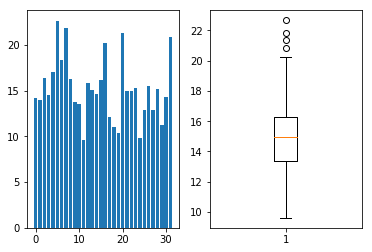

In [205]:
    ax1=plt.subplot(1,2,1)
    plt.bar(range(len(df)),df)
    ax2=plt.subplot(1,2,2)   
    plt.boxplot(df)
    plt.show()   #剩余的四个离群点与上边缘比较接近可以保留

In [9]:
    del every_plt[35]
    del every_plt[32]
    del every_plt[26:29]
    del every_plt[17:19]
    del every_plt[8]
    del every_plt[5]
    for index,every in enumerate(every_plt):
        every.plot()
        plt.title(index)   #绘制每一个子图，通过观察查看数据有无异常
    plt.show()

In [209]:
    for index,every in enumerate(every_plt):
        every.to_json("C:/Users/hw1102/Desktop/data/accelerometer/preprocessed_health/data"+str(index), orient='records') 

# device_motion/anxiety数据预处理

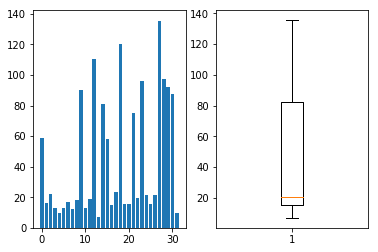

In [11]:
    import pandas as pd
    import matplotlib.pyplot as plt
    import os
    l=os.listdir("C:/Users/hw1102/Desktop/data/device_motion/anxiety")
    """
    首先对device_motion/health文件进行预处理，通过数据探索绘制条形图发现，数据方差较大，但是无离群点
    """
    df=[]
    every_plt=[]
    for file in l:
        indexs = pd.read_json("C:/Users/hw1102/Desktop/data/device_motion/anxiety/"+file)
        every_plt.append(indexs)
        df.append(len(indexs)/300)
    del df[23]
    del df[10]
    ax1=plt.subplot(1,2,1)
    plt.bar(range(len(df)),df)
    ax2=plt.subplot(1,2,2)   
    plt.boxplot(df)
    plt.show()

In [10]:
    for index,every in enumerate(every_plt):
        every.plot()
        plt.title(index)
    plt.show()

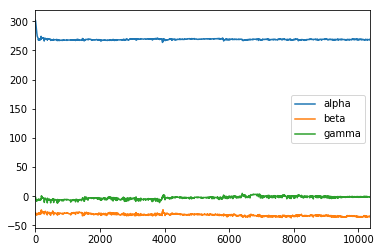

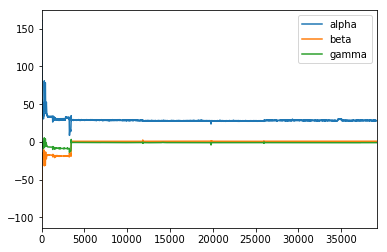

In [10]:
every_plt[23].plot()
every_plt[10].plot()
plt.show()   #数据为异常值，进行删除

In [12]:
del every_plt[23]
del every_plt[10]

In [14]:
    #将删除空记录以及去除异常记录后的文件进行保存
    for index,every in enumerate(every_plt):
        every.to_json("C:/Users/hw1102/Desktop/data/device_motion/preprocessed_anxiety/data"+str(index), orient='records') 

# device_motion/health数据预处理

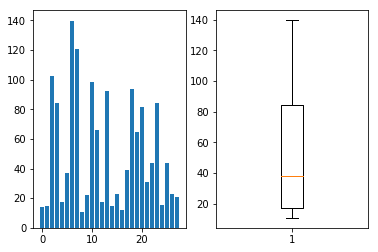

In [25]:
    l=os.listdir("C:/Users/hw1102/Desktop/data/device_motion/health")
    """
    首先对device_motion/health文件进行预处理，通过数据探索绘制条形图发现，数据方差较大，盒图无离群点
    """
    df=[]
    every_plt=[]
    for file in l:
        indexs = pd.read_json("C:/Users/hw1102/Desktop/data/device_motion/health/"+file)
        every_plt.append(indexs)
        df.append(len(indexs)/300)
    del df[23]
    del df[19]
    del df[17]
    del df[15]
    del df[12]
    ax1=plt.subplot(1,2,1)
    plt.bar(range(len(df)),df)
    ax2=plt.subplot(1,2,2)   
    plt.boxplot(df)
    plt.show()

C:\Users\hw1102\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


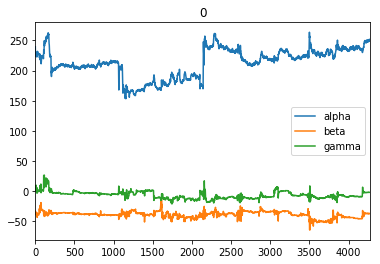

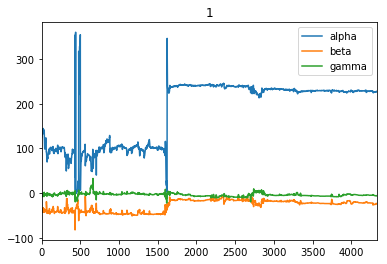

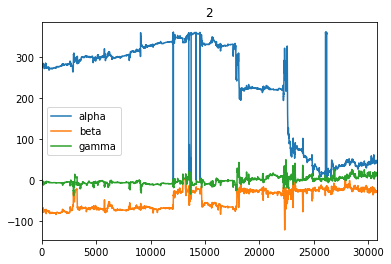

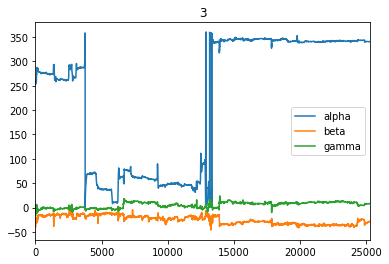

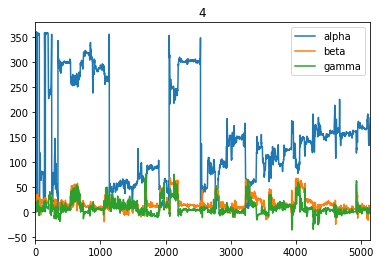

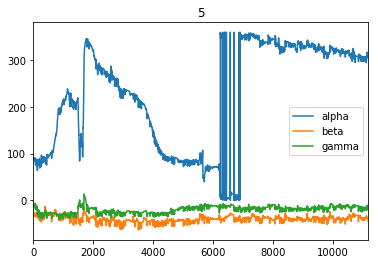

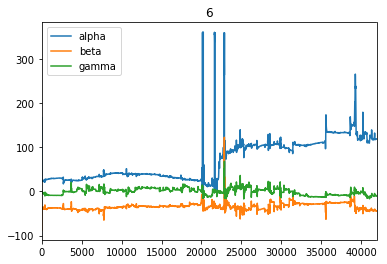

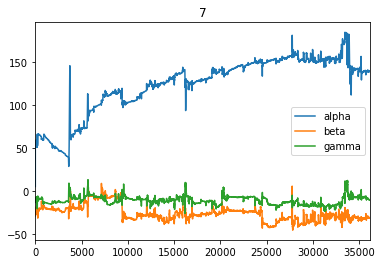

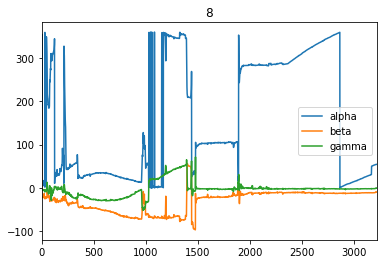

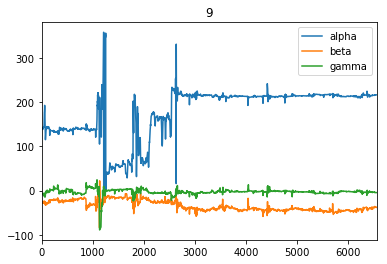

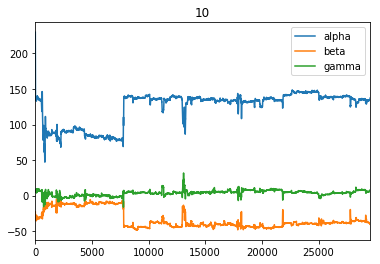

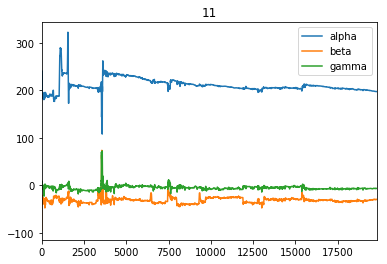

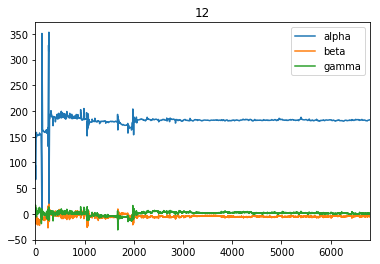

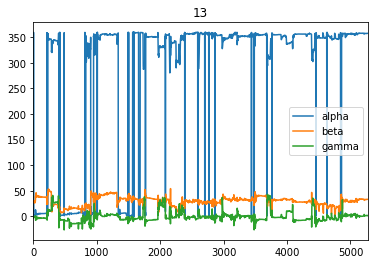

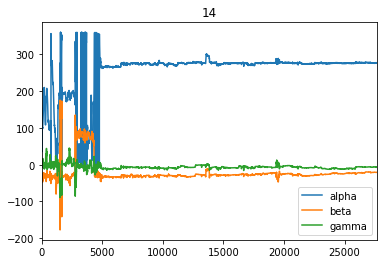

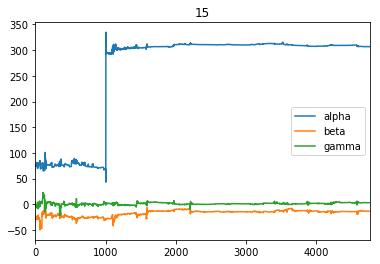

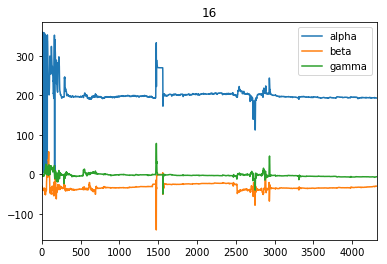

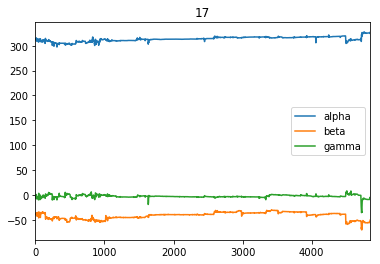

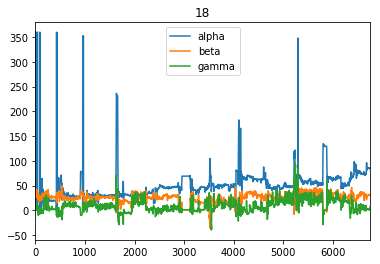

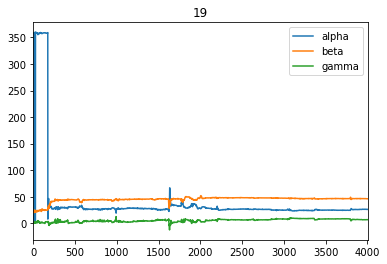

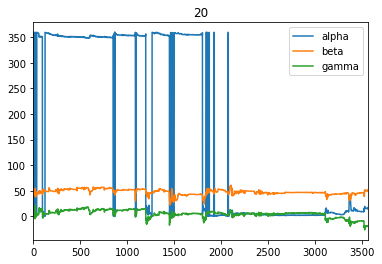

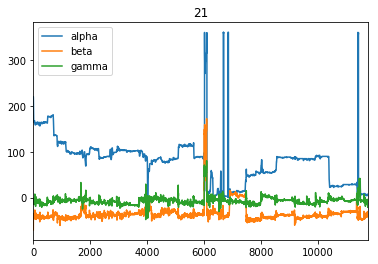

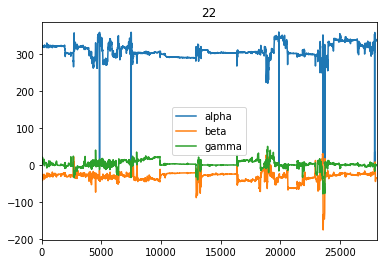

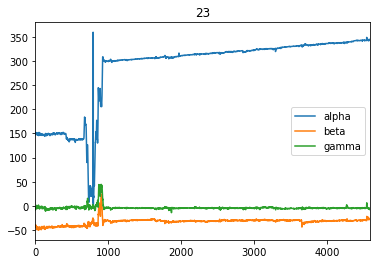

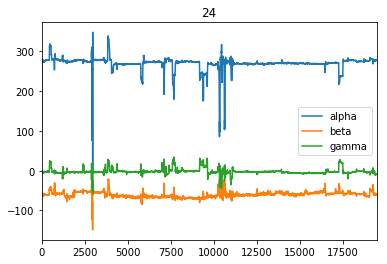

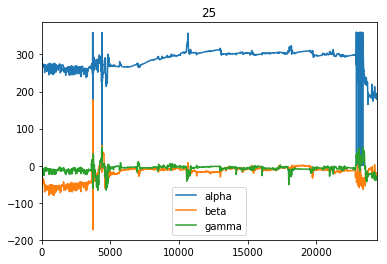

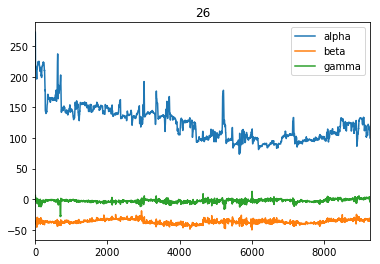

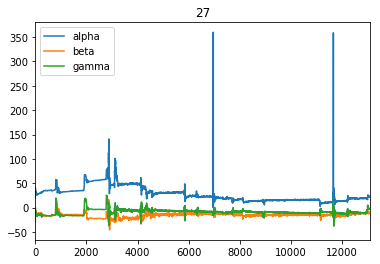

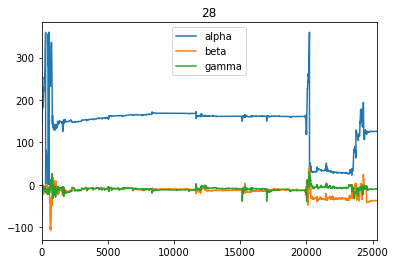

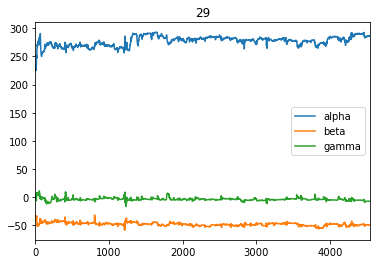

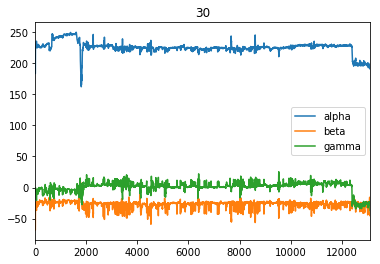

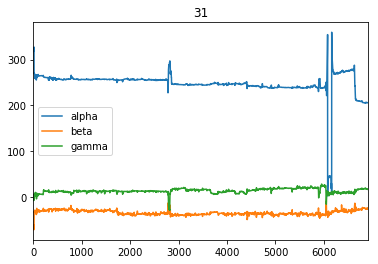

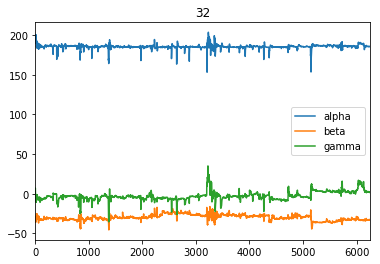

In [18]:
    for index,every in enumerate(every_plt):
        every.plot()
        plt.title(index)
    plt.show()

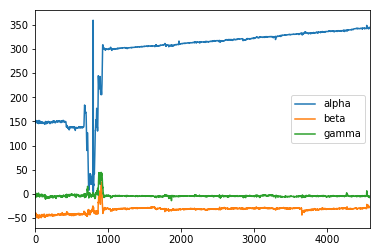

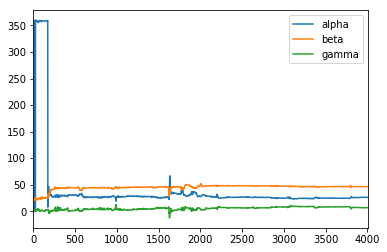

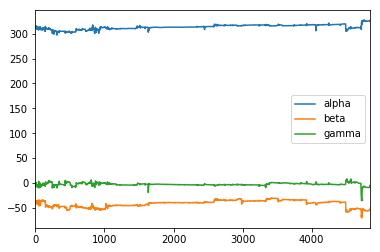

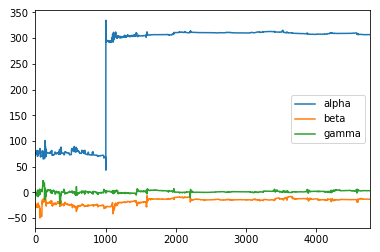

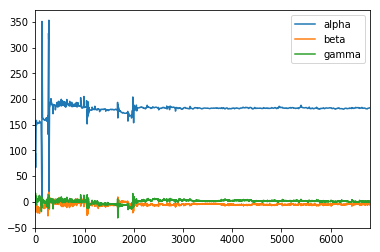

In [22]:
every_plt[23].plot()
every_plt[19].plot()
every_plt[17].plot()
every_plt[15].plot()
every_plt[12].plot()
plt.show()

In [24]:
del every_plt[23]
del every_plt[19]
del every_plt[17]
del every_plt[15]
del every_plt[12]

In [27]:
    #将删除空记录以及去除异常记录后的文件进行保存
    for index,every in enumerate(every_plt):
        every.to_json("C:/Users/hw1102/Desktop/data/device_motion/preprocessed_health/data"+str(index), orient='records') 